In [35]:
import pandas as pd

df = pd.read_csv('some_results.tsv', delim_whitespace=True, header=0)
df.head()

,UserID,N,Poison,Test,Ctx-S,Ctx-C,MRR-S,MRR-C,Δ-C
0,1338,267,0%,80,280,21093,0.547,0.515,-0.032
1,1338,267,10%,80,280,21093,0.547,0.441,-0.106
2,1338,267,20%,80,280,21093,0.547,0.485,-0.061
3,1338,267,50%,80,280,21093,0.547,0.322,-0.225
4,1338,267,80%,80,280,21093,0.547,0.144,-0.403


In [29]:
import matplotlib.pyplot as plt
import tikzplotlib

# [FIX] AttributeError: 'Line2D' object has no attribute '_us_dashSeq'

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols, lambda self, value: setattr(self, "_ncols", value))

# [FIX] AttributeError: 'Legend' object has no attribute '_ncol'
    
def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)


Number of unique users in the dataset: 132
Mean ± Variance of MRR-C for each Poison level:
  Poison         result
0     0%  0.621 ± 0.015
1    10%  0.608 ± 0.017
3    20%  0.593 ± 0.015
4    50%  0.342 ± 0.013
5    80%  0.169 ± 0.003
2   100%  0.159 ± 0.003


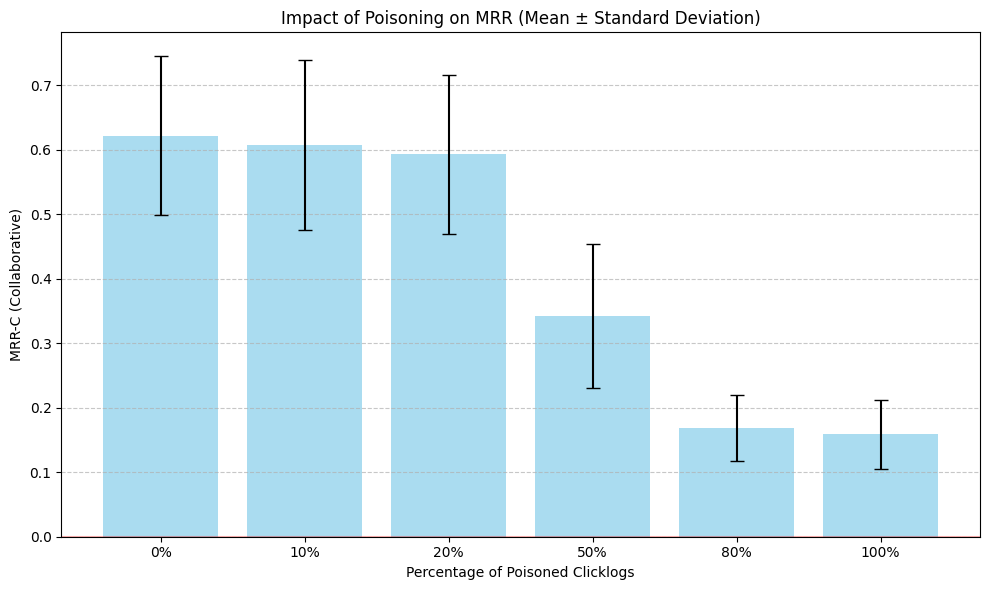

In [37]:
# Group by Poison level and calculate mean and variance of MRR-C
poison_stats = df.groupby('Poison')['MRR-C'].agg(['mean', 'var']).reset_index()

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Sort the dataframe according to the defined order
poison_stats['Poison'] = pd.Categorical(poison_stats['Poison'], categories=poison_order, ordered=True)
poison_stats = poison_stats.sort_values('Poison')

# Format the results as mean ± variance
poison_stats['result'] = poison_stats['mean'].round(3).astype(str) + ' ± ' + poison_stats['var'].round(3).astype(str)

# Count the number of unique users in the dataset
num_users = df['UserID'].nunique()
print(f"Number of unique users in the dataset: {num_users}")


# Display the results
print("Mean ± Variance of MRR-C for each Poison level:")
print(poison_stats[['Poison', 'result']])

# Create a bar plot to visualize the results
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
bars = plt.bar(poison_stats['Poison'], poison_stats['mean'], yerr=np.sqrt(poison_stats['var']), 
               capsize=5, alpha=0.7, color='skyblue')

plt.title('Impact of Poisoning on MRR (Mean ± Standard Deviation)')
plt.xlabel('Percentage of Poisoned Clicklogs')
plt.ylabel('MRR-C (Collaborative)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()


plt.tight_layout()
tikzplotlib_fix_ncols(plt)
tikzplotlib.save("poison_impact_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')



In [34]:
# Calculate mean and standard deviation for specified columns grouped by Poison level
columns_to_analyze = ['MRR-C', 'Δ-C']

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Calculate mean for each poison level
mean_stats = df.groupby(['Poison'])[columns_to_analyze].mean().reset_index()
mean_stats['Poison'] = pd.Categorical(mean_stats['Poison'], categories=poison_order, ordered=True)
mean_stats = mean_stats.sort_values('Poison')

# Calculate standard deviation for each poison level
std_stats = df.groupby(['Poison'])[columns_to_analyze].std().reset_index()
std_stats['Poison'] = pd.Categorical(std_stats['Poison'], categories=poison_order, ordered=True)
std_stats = std_stats.sort_values('Poison')

# Create a formatted table with mean ± std
result_stats = mean_stats.copy()
for col in columns_to_analyze:
    result_stats[col] = mean_stats[col].apply(lambda x: f"{x:.3f}").astype(str) + ' ± ' + std_stats[col].apply(lambda x: f"{x:.3f}").astype(str)

# Display the results with mean ± standard deviation
result_stats

,Poison,MRR-C,Δ-C
0,0%,0.633 ± 0.120,0.150 ± 0.143
1,10%,0.621 ± 0.130,0.137 ± 0.153
3,20%,0.604 ± 0.123,0.120 ± 0.140
4,50%,0.342 ± 0.117,-0.141 ± 0.180
5,80%,0.167 ± 0.050,-0.316 ± 0.165
2,100%,0.157 ± 0.052,-0.326 ± 0.174


In [44]:
# Load the semantica vs random comparison data
semantica_vs_random = pd.read_csv('semantica_vs_random.tsv', delim_whitespace=True, header=0)

# Display the first few rows to verify the data
print("Semantica vs Random Comparison Data:")
semantica_vs_random.head()

# Calculate summary statistics
summary_stats = semantica_vs_random.describe()

# Calculate mean and standard deviation for each MRR type
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']
mrr_stats = {
    'Mean': semantica_vs_random[mrr_columns].mean(),
    'Std': semantica_vs_random[mrr_columns].std()
}

# Create a DataFrame for the statistics
mrr_stats_df = pd.DataFrame(mrr_stats)
print("\nMRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {mrr_stats_df.loc[col, 'Mean']:.3f} ± {mrr_stats_df.loc[col, 'Std']:.3f}")


Semantica vs Random Comparison Data:

MRR Statistics (Mean ± Std):
MRR-L: 0.465 ± 0.133
MRR-R: 0.627 ± 0.123
MRR-S: 0.625 ± 0.128


In [1]:
# Load the AOL dataset document file
import pandas as pd
import json
from pathlib import Path

# Define the path to the AOL dataset document file
file_path = '/Users/marcel/Documents/Tribler Datasets/.ir_datasets/aol-ia/downloaded_docs/0.jsonl'

# Check if the file exists
if Path(file_path).exists():
    # Read the JSONL file line by line
    docs = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                docs.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Error decoding JSON line: {line}")
    
    # Convert to DataFrame
    docs_df = pd.DataFrame(docs)
    
    # Display information about the loaded data
    print(f"Loaded {len(docs_df)} documents from AOL dataset")
    print("\nDataFrame columns:")
    print(docs_df.columns.tolist())
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    display(docs_df.head())
    
    # Display basic statistics
    print("\nBasic statistics:")
    if 'body' in docs_df.columns:
        docs_df['body_length'] = docs_df['body'].apply(lambda x: len(x) if isinstance(x, str) else 0)
        print(f"Average document length: {docs_df['body_length'].mean():.2f} characters")
    
    # Count missing values
    print("\nMissing values per column:")
    print(docs_df.isna().sum())
else:
    print(f"File not found: {file_path}")
    print("Please check the path and make sure the file exists.")


Loaded 95362 documents from AOL dataset

DataFrame columns:
['doc_id', 'url', 'wb_url', 'title', 'text']

First 5 rows:


,doc_id,url,wb_url,title,text
0,078c6229933e,http://www.fasteningproducts.net,https://web.archive.org/web/20060110225946/htt...,Home,Welcome to Fastening Products of LancasterFast...
1,0585fcd2de12,http://www.maseratidealers.com,https://web.archive.org/web/20060409061055/htt...,Maserati,
2,052d3ed297c5,http://www.thing-e.info,https://web.archive.org/web/20140106112103/htt...,,
3,01fce9745047,http://www.eides.com,https://web.archive.org/web/20060403005852/htt...,Eide 's Entertainment,WELCOME TO EIDE 'S ENTERTAINMENT Your complete...
4,06994876352a,http://xzpooping.splinder.com,https://web.archive.org/web/20060206163029/htt...,"-=E Pooping PORN - women , pants anal girl and...",pooping mpegs pooping pants scat bitch xxx fre...



Basic statistics:

Missing values per column:
doc_id    0
url       0
wb_url    0
title     0
text      0
dtype: int64


In [2]:
# Calculate word count statistics for the text column
if 'text' in docs_df.columns:
    # Count words in each document
    docs_df['word_count'] = docs_df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    # Calculate statistics
    max_words = docs_df['word_count'].max()
    avg_words = docs_df['word_count'].mean()
    median_words = docs_df['word_count'].median()
    
    # Display results
    print("\nWord count statistics for 'text' column:")
    print(f"Maximum word count: {max_words}")
    print(f"Average word count: {avg_words:.2f}")
    print(f"Median word count: {median_words}")
    
    # Show distribution of word counts
    print("\nWord count distribution:")
    print(docs_df['word_count'].describe())
    
    # Find the document with the maximum word count
    max_word_doc = docs_df.loc[docs_df['word_count'].idxmax()]
    print("\nDocument with maximum word count:")
    print(f"Document ID: {max_word_doc.get('doc_id', 'N/A')}")
    print(f"URL: {max_word_doc.get('url', 'N/A')}")
    print(f"Title: {max_word_doc.get('title', 'N/A')}")
else:
    print("\nNo 'text' column found in the dataset.")



Word count statistics for 'text' column:
Maximum word count: 226523
Average word count: 602.43
Median word count: 223.0

Word count distribution:
count     95362.000000
mean        602.428294
std        2799.350831
min           0.000000
25%          54.000000
50%         223.000000
75%         511.000000
max      226523.000000
Name: word_count, dtype: float64

Document with maximum word count:
Document ID: 0a3019944ff7
URL: http://thisdayinhistory.blogspot.com
Title: This Day in History


In [10]:
import pandas as pd

# Load the data
df = pd.read_csv('some_results.tsv', delim_whitespace=True, header=0)

# Define the columns to analyze
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']

# Calculate mean and standard deviation
means = df[mrr_columns].mean()
stds = df[mrr_columns].std()

# Print results
print("MRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {means[col]:.3f} ± {stds[col]:.3f}")

MRR Statistics (Mean ± Std):
MRR-L: 0.525 ± 0.068
MRR-R: 0.375 ± 0.128
MRR-S: 0.376 ± 0.107


In [11]:
import pandas as pd
import numpy as np

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

print(user_embeddings_df.head())


    AnonID                                          embedding
0  4071847  [ 7.44519755e-03 -3.33327875e-02  2.94009950e-...
1  3052241  [-1.30685195e-02 -3.08464132e-02  2.03749221e-...
2  1523743  [ 9.20531247e-03 -3.41259651e-02  3.17560025e-...
3  5926042  [ 4.70411032e-03 -2.31376663e-02  3.36696580e-...
4  1747127  [-3.42316995e-03 -2.58689430e-02  2.53010374e-...


In [ ]:
import pandas as pd
import numpy as np
import re
import lmdb
import pickle
import os

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

# Create LMDB environment
db_path = 'user_embeddings.lmdb'
map_size = 10 * 1024 * 1024 * 1024  # 10GB should be enough for user embeddings

# Open the database
env = lmdb.open(db_path, map_size=map_size)

# Process all user embeddings and store them in the database
with env.begin(write=True) as txn:
    for index, row in user_embeddings_df.iterrows():
        user_id = row['AnonID']
        embedding_str = row['embedding']
        
        # Clean the string and convert to numpy array
        clean_str = embedding_str.strip('[]')
        values = re.split(r'\s+', clean_str)
        embedding_array = np.array([float(val) for val in values if val])
        
        # Store the embedding in the database
        txn.put(str(user_id).encode(), pickle.dumps(embedding_array))

# Close the environment
env.close()

print(f"Successfully created LMDB database at {db_path}")
print(f"Total users processed: {len(user_embeddings_df)}")

Successfully created LMDB database at user_embeddings.lmdb
Total users processed: 19240

Error retrieving sample user: name 'doc_id' is not defined


In [1]:
# Verify by retrieving a sample user
sample_user_id = 1523743
from utils.db import get_user_embedding

try:
    sample_embedding = get_user_embedding(sample_user_id)
    if sample_embedding is not None:
        print(f"\nVerification for user {sample_user_id}:")
        print(f"Embedding shape: {sample_embedding.shape}")
        print(f"First few values: {sample_embedding[:5]}")
    else:
        print(f"\nUser {sample_user_id} not found in the database.")
except Exception as e:
    print(f"\nError retrieving sample user: {e}")



Verification for user 1523743:
Embedding shape: (768,)
First few values: [ 0.00920531 -0.03412597  0.031756    0.02844471  0.00627908]


In [2]:
from datasets.aol4ps import load_dataset

df, _, _ = load_dataset('aol4ps')

df.head()

,AnonID,QueryIndex,QueryTime,SessionNo,DataType,DocIndex,CandiList,ClickPos
632114,2420729,q-218577,2006-03-01 00:02:05,452138,0,d-6293,d-373522\td-284542\td-278851\td-866048\td-6842...,5
183427,713071,q-70157,2006-03-01 00:02:25,131654,0,d-26656,d-469101\td-325736\td-52859\td-125305\td-60369...,5
221168,861363,q-83973,2006-03-01 00:02:42,158371,0,d-257724,d-479809\td-169720\td-309620\td-118537\td-4432...,5
558208,2126555,q-1092,2006-03-01 00:03:05,398884,0,d-2028,d-557711\td-20622\td-42821\td-290010\td-938913...,5
183428,713071,q-70158,2006-03-01 00:03:15,131654,0,d-28296,d-906561\td-158539\td-244003\td-358791\td-1252...,5


In [4]:
df['ClickPos'].value_counts()

5    239436
0    111215
1     38546
2     21179
3     15052
4     10634
6      7313
7      6424
8      5621
9      5250
Name: ClickPos, dtype: int64

In [8]:
import numpy as np

df['ReciprocalRank'] = 1 / (df['ClickPos'] + 1)
mean_reciprocal_rank = df['ReciprocalRank'].mean()

print(f"BM25 MRR: {mean_reciprocal_rank:.4f}")
print("Random MRR: ", np.mean([1 / i for i in range(1, 11)]))
print("Worst case MRR: ", 1 / 10)

BM25 MRR: 0.4045
Random MRR:  0.2928968253968254
Worst case MRR:  0.1


# Semantica Sanity Check

In [1]:
from datasets.aol4ps import load_dataset
from utils.db import get_doc_embedding
from semantica.graph import get_neighbors
import random
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors a and b, handling any array shape."""
    a_flat = np.ravel(a)
    b_flat = np.ravel(b)
    
    if norm(a_flat) == 0 or norm(b_flat) == 0:
        return 0.0
    
    return float(dot(a_flat, b_flat)/(norm(a_flat)*norm(b_flat)))

df, queries_df, docs_df = load_dataset('AOL4PS')
all_users = df['AnonID'].unique()

def get_user_embedding(user_id):
    doc_ids = df[df['AnonID'] == user_id]['DocIndex'].unique()
    embeddings = [get_doc_embedding(doc_id) for doc_id in doc_ids]
    embeddings = [emb for emb in embeddings if emb is not None]
    return np.mean(embeddings, axis=0)

for user_id in all_users:
    user_emb = get_user_embedding(user_id)
    if len(get_neighbors(user_id)) == 0:
        continue

    semantica_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in get_neighbors(user_id)], axis=0)
    random_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in random.sample(list(all_users), len(get_neighbors(user_id)))], axis=0)

    semantic_similarity = cosine_similarity(user_emb, semantica_neighbors_avg_emb)
    random_similarity = cosine_similarity(user_emb, random_neighbors_avg_emb)

    print(f"User={user_id}, N={len(get_neighbors(user_id))}, \tSemantica neighborhood similarity: {semantic_similarity:.3f}, Random neighborhood similarity: {float(random_similarity):.3f}")


/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


User=2420729, N=75, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.988
User=713071, N=41, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.997
User=861363, N=91, 	Semantica neighborhood similarity: 0.990, Random neighborhood similarity: 0.988
User=2126555, N=38, 	Semantica neighborhood similarity: 0.995, Random neighborhood similarity: 0.994
User=461601, N=49, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.983
User=556178, N=29, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.996
User=3013856, N=29, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.994
User=1662860, N=42, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.993
User=275721, N=33, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.956
User=908731, N=35, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.995
Us

KeyboardInterrupt: 

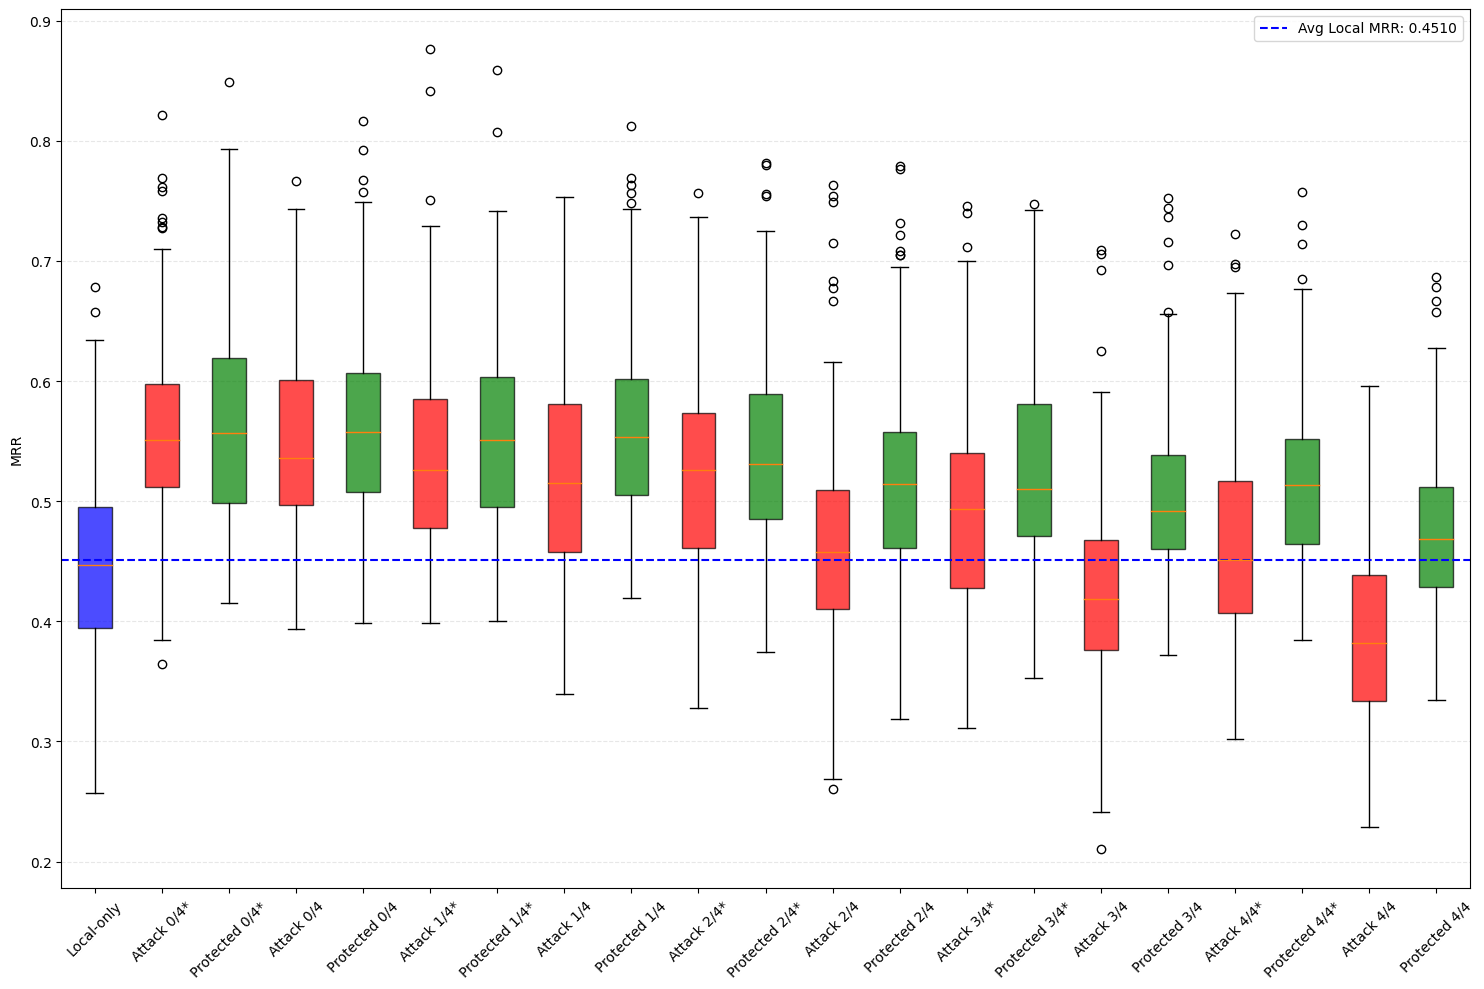

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the poisoning results from TSV file
poison_results = pd.read_csv('poison_results_random.tsv', sep='\t', header=None)

# Define column meanings
# First column: local MRR
# Next 10 columns (1-10): collaborative MRR under different attacks
# Last 10 columns (11-20): collaborative MRR with protection algorithm under same attacks

# Create a figure for boxplots
plt.figure(figsize=(15, 10))

# Number of attack scenarios
num_attacks = 10

# Prepare data for boxplot - rearranging to group attack and protected side by side
data_to_plot = []
labels = []

# Add local MRR as the first boxplot
data_to_plot.append(poison_results[0])
labels.append('Local-only')
import math
# Add attack and protected scenarios side by side
for i in range(1, 11):
    # Add attack scenario
    data_to_plot.append(poison_results[i])
    n_byzantine_peers = math.floor((i-1)/2)
    labels.append(f'Attack {n_byzantine_peers}/4{"*" if i % 2 == 1 else ""}')
    
    # Add corresponding protected scenario
    data_to_plot.append(poison_results[i+10])
    labels.append(f'Protected {n_byzantine_peers}/4{"*" if i % 2 == 1 else ""}')

# Create boxplot
box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Set colors for boxplots - blue for local, red for attacks, green for protected
colors = ['blue']
for i in range(1, len(data_to_plot)):
    if i % 2 == 1:  # Attack scenarios
        colors.append('red')
    else:  # Protected scenarios
        colors.append('green')

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add a horizontal line for the average local MRR
plt.axhline(y=poison_results[0].mean(), color='blue', linestyle='--', 
            label=f'Avg Local MRR: {poison_results[0].mean():.4f}')

# Add labels and title
plt.ylabel('MRR')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

# Save the current figure to a tikz file
tikzplotlib_fix_ncols(plt)
tikzplotlib.save("poison_attacks.tex", axis_width=r'\textwidth', axis_height=r'8cm')

In [88]:
import re
import ir_datasets
from rank_bm25 import BM25Okapi

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower().strip())

dataset = ir_datasets.load("aol-ia")
doc_ids = [doc.doc_id for doc in dataset.docs_iter()]
bm25 = BM25Okapi([tokenize(doc.title) for doc in dataset.docs_iter()])


In [105]:
10//2

5

In [134]:
def fixed_window(items, target_index, window_size):
    assert target_index < len(items) and target_index >= 0
    half_window = window_size // 2

    # Ensure the window does not go out of bounds
    start_index = max(0, target_index - half_window)
    end_index = min(len(items), target_index + half_window)

    # If target is close to bounds, extend the window to ensure window_size is met
    if target_index < half_window:
        end_index += half_window - target_index
    if target_index + half_window > len(items):
        start_index -= target_index + half_window - len(items)

    return items[start_index:end_index]

items = list(range(100))
assert fixed_window(items, 50, 10) == [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
assert fixed_window(items, 5, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 4, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 0, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 90, 10) == [85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
assert fixed_window(items, 97, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
assert fixed_window(items, 99, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

fixed_window(items, 20, 10)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [133]:
import pandas as pd
import re
import ir_datasets
from rank_bm25 import BM25Okapi

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower().strip())

dataset = ir_datasets.load("aol-ia")
doc_ids = [doc.doc_id for doc in dataset.docs_iter()]
bm25 = BM25Okapi([tokenize(doc.title) for doc in dataset.docs_iter()])

# Create empty lists to store data
data = []

for qlog in dataset.qlogs_iter():
    if len(qlog.items) == 0:
        continue

    target_doc_id = qlog.items[0].doc_id
    if target_doc_id not in doc_ids:
        print(f"Warning: target_doc_id '{target_doc_id}' not found in doc_ids")
        continue

    scores = bm25.get_scores(tokenize(qlog.query))
    top_doc_ids = [doc_ids[idx] for idx in sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)]    
    target_index = top_doc_ids.index(target_doc_id)
    candidate_doc_ids = fixed_window(top_doc_ids, target_index, 10)
    
    # Append data to list
    data.append({
        'user_id': qlog.user_id,
        'time': qlog.time,
        'query': qlog.query,
        'doc_id': target_doc_id,
        'candidate_doc_ids': candidate_doc_ids
    })

# Create DataFrame from collected data
df = pd.DataFrame(data)
df.head()

KeyboardInterrupt: 

In [6]:
from autonomos.datasets.aol import load_dataset
import re 

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower().strip())

df = load_dataset()

In [20]:
import pandas as pd
df = pd.read_csv('data/aol_dataset.csv', keep_default_na=False, parse_dates=['time'])
df.sort_values('time')
df.head()

,user_id,time,query,doc_id,candidate_doc_ids
0,142,2006-03-20 03:55:57,westchester gov,430d8aa747a3,"['24610fc66824', 'c1b01ed13560', 'b7d251339073..."
1,142,2006-04-08 01:31:14,207 ad2d 530,972de98d4aca,"['5f82e1ddd9a0', '3b903278b865', '5fcaefb50d3a..."
2,142,2006-04-08 08:38:42,vera org,1eab70674ce5,"['35d3923c1350', '19b7a0e4c473', 'b7e96cb70a92..."
3,217,2006-03-01 11:58:51,lottery,ecd6d884243b,"['a3abc615f7d4', 'c738b30cfa17', '93128bd510de..."
4,217,2006-03-01 11:58:51,lottery,ecd6d884243b,"['a3abc615f7d4', 'c738b30cfa17', '93128bd510de..."


In [16]:
start = math.ceil(dataset.qlogs_count() / 12)
end = start + start
print(start, end)
for doc in dataset.docs_iter()[start:end]:
    print(doc)

3032464 6064928


In [17]:
dataset.docs_count()

1525586